In [83]:
import numpy as np
import pandas as pd
import datetime as dt
from matplotlib import pyplot as plt 

In [84]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #to get AR Order and MA Order
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA # pass i = 0 and MA order = 0

In [85]:
def datetimeparser (x):
  return dt.datetime.strptime(str(x), '%Y-%m')

In [86]:
salesdf = pd.read_csv('freres_monthly_champagne.csv')
salesdf.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [87]:
salesdf.dropna(inplace=True)
salesdf['Month'] = salesdf['Month'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m'))
salesdf.set_index('Month', inplace = True)
salesdf.columns = ['Sales']
salesdf.head()
#df_ice_cream['date'] = pd.to_datetime(df_ice_cream.date)

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


<AxesSubplot:xlabel='Month'>

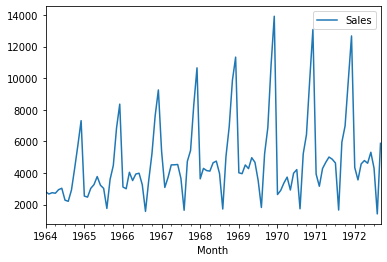

In [88]:
salesdf.plot()

In [89]:
import statsmodels.api as sm

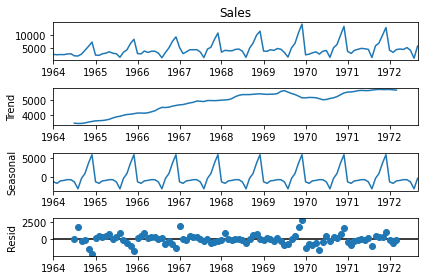

<Figure size 1440x360 with 0 Axes>

In [90]:
res = sm.tsa.seasonal_decompose(salesdf['Sales'],period=12)
fig = res.plot()
plt.figure(figsize=(20,5))
plt.show()

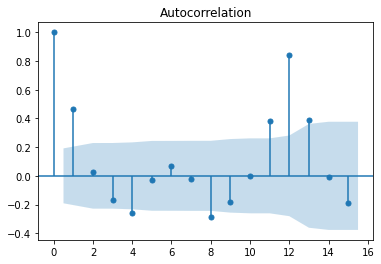

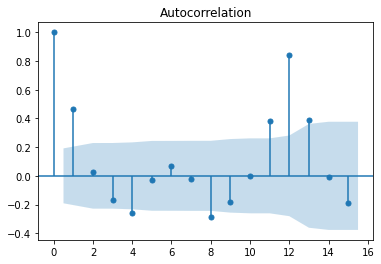

In [91]:
plot_acf(salesdf, lags = 15)

d:\program files\python39\datascience\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


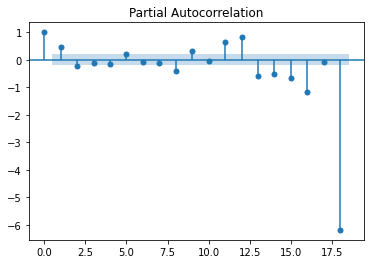

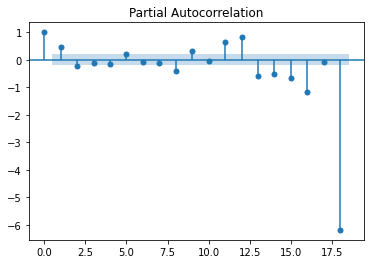

In [92]:
plot_pacf(salesdf['Sales'], lags = 18)

# Perform Dicky Fuller Test for Stationarity

In [93]:
from statsmodels.tsa.stattools import adfuller
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Since p-value < 0.05 strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Since p-value > 0.05 weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [94]:
adfuller_test(salesdf['Sales'])

ADF Test Statistic : -1.8335930563276197
p-value : 0.3639157716602465
#Lags Used : 11
Number of Observations Used : 93
Since p-value > 0.05 weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [95]:
salesdf

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [96]:
salesdfdiff = salesdf.diff(periods=1) #(yt = yt - yt-1) removing Trend Mean becomes constant but variance is having problem that means Trend is there 
#AR and MA to be determined and I is there for sure
salesdfdiff = salesdfdiff[1:]
salesdfdiff.head(5)

,Sales
Month,
1964-02-01,-143.0
1964-03-01,83.0
1964-04-01,-34.0
1964-05-01,225.0
1964-06-01,90.0


<AxesSubplot:xlabel='Month'>

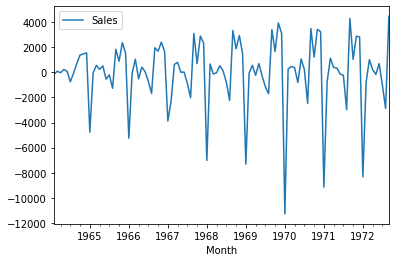

In [97]:
salesdfdiff.plot()

<AxesSubplot:xlabel='Month'>

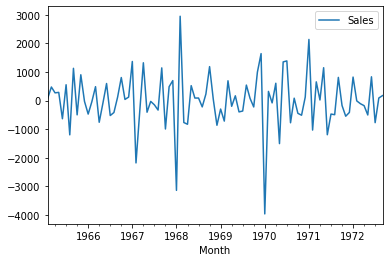

In [98]:
salesdfdiff2 = salesdfdiff.diff(periods=12) #(yt = yt - yt-1)  Meab ==
salesdfdiff2 = salesdfdiff2[12:]  #S seasonal component is 12. We got I = 1 S = 12
salesdfdiff2.head(15)
salesdfdiff2.plot()

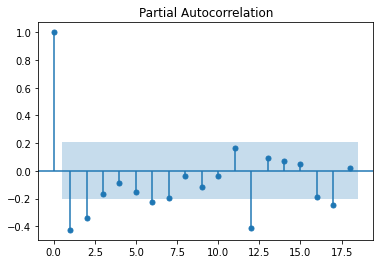

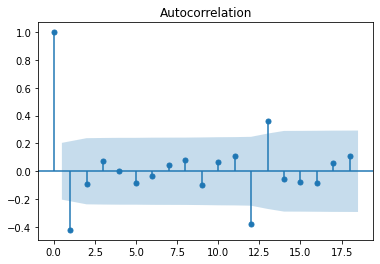

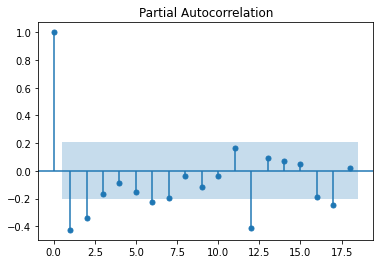

In [99]:
plot_acf(salesdfdiff2['Sales'], lags = 18)
plot_pacf(salesdfdiff2['Sales'], lags = 18)

In [100]:
#Recheck Dicky Fuller Test
adfuller_test(salesdfdiff2['Sales'])

ADF Test Statistic : -4.427713497307515
p-value : 0.0002650462849293356
#Lags Used : 11
Number of Observations Used : 80
Since p-value < 0.05 strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


# Manually Getting ACF and PACF Plots via ACF and PACF Corelation values

d:\program files\python39\datascience\lib\site-packages\statsmodels\tsa\stattools.py:655: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
d:\program files\python39\datascience\lib\site-packages\statsmodels\tsa\stattools.py:665: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


<BarContainer object of 20 artists>

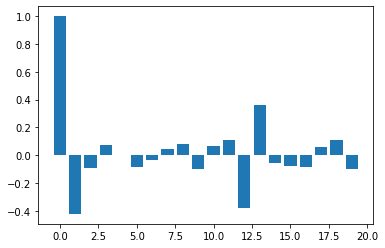

In [101]:
######GETTING ACF PACF Values
from statsmodels.tsa.stattools import acf, pacf
acf_vals = acf(salesdfdiff2['Sales'])
num_lags = 20
plt.bar(range(num_lags), acf_vals[:num_lags])

d:\program files\python39\datascience\lib\site-packages\statsmodels\tsa\stattools.py:1022: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
d:\program files\python39\datascience\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


<BarContainer object of 15 artists>

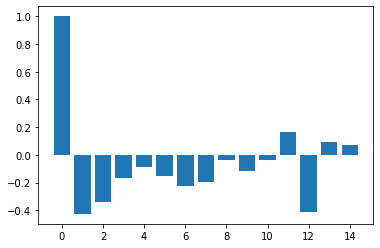

In [102]:
pacf_vals = pacf(salesdfdiff2['Sales'])
num_lags = 15
plt.bar(range(num_lags), pacf_vals[:num_lags])

#Train Test Split

In [103]:
test_end = len(salesdf)
print(test_end)
train_end = int((len(salesdf)) - 12)
print(train_end)
train_sales = salesdf[:train_end]
test_sales = salesdf[train_end:]
print(len(train_sales))
print(len(test_sales))
salesdf.head(5)

105
93
93
12


,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


SARIMAX Parameters

1) order : (p,d,q) order of the model for the number of AR parameters, differences, and MA parameters. d must be 
 an integer indicating the integration order of the process, while p and q may either be an integers indicating 
 the AR and MA orders (so that all lags up to those orders are included)

2) seasonal_order: iterable, optional - The (P,D,Q,s) order of the seasonal component of the model for the AR parameters, 
 differences, MA parameters, and periodicity. D must be an integer indicating the integration order of the process, 
 while P and Q may either be an integers indicating the AR and MA orders (so that all lags up to those orders are included) 
 or else iterables giving specific AR and / or MA lags to include. s is an integer giving the periodicity (number of periods 
 in season), often it is 4 for quarterly data or 12 for monthly data. Default is no seasonal effect.
 
3) endog : The observed time-series process 

4) exog : Array of exogenous regressors, shaped nobs x k. (Also called explanatory variables)

In [104]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(endog = train_sales['Sales'],order=(2, 1, 1),seasonal_order=(2,1,1,12))

d:\program files\python39\datascience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
d:\program files\python39\datascience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [105]:
results=model.fit()

d:\program files\python39\datascience\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [106]:
forecastvals=results.predict(start=train_end,end=test_end,dynamic=True)
print(train_end)

93


In [107]:
test_sales

,Sales
Month,
1971-10-01,6981.0
1971-11-01,9851.0
1971-12-01,12670.0
1972-01-01,4348.0
1972-02-01,3564.0
1972-03-01,4577.0
1972-04-01,4788.0
1972-05-01,4618.0
1972-06-01,5312.0


In [108]:
forecastvals

1971-10-01     7114.059092
1971-11-01    11092.689078
1971-12-01    14682.130075
1972-01-01     3199.644058
1972-02-01     2895.701386
1972-03-01     3821.021627
1972-04-01     4261.042731
1972-05-01     3978.794106
1972-06-01     4490.312268
1972-07-01     4553.696239
1972-08-01     1430.199165
1972-09-01     5814.145070
1972-10-01     7018.477522
Freq: MS, Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='Month'>

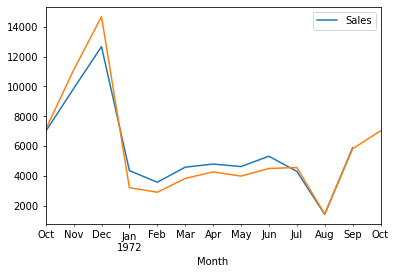

In [109]:
test_sales.plot()
forecastvals.plot()

In [110]:
print('AIC Value: ' , results.aic)
print('BIC Value: ' , results.bic)
print('HQIC Value: ' , results.hqic)
print(results.summary()) #AIC - Akaike Information Criterion

AIC Value:  1296.205605580737
BIC Value:  1312.8797920234542
HQIC Value:  1302.890764051709
                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   93
Model:             SARIMAX(2, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -641.103
Date:                            Mon, 11 Jan 2021   AIC                           1296.206
Time:                                    11:08:40   BIC                           1312.880
Sample:                                01-01-1964   HQIC                          1302.891
                                     - 09-01-1971                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3327 

d:\program files\python39\datascience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
d:\program files\python39\datascience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Month'>

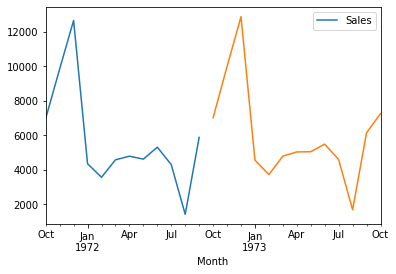

In [111]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(endog = salesdf['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()
forecastvals=results.predict(start=105,end=117,dynamic=True)
test_sales.plot()
forecastvals.plot()

In [112]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -738.402
Date:                            Mon, 11 Jan 2021   AIC                           1486.804
Time:                                    11:08:41   BIC                           1499.413
Sample:                                01-01-1964   HQIC                          1491.893
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2790      0.081      3.433      0.001       0.120       0.438
ma.L1         -0.9494      0.043    -22.334      0.000      -1.033      -0.866
ar.S.L12      -0.4544      0.303     -1.499      0.134      -1.049       0.140
ma.S.L12       0.2450      0.311      0.788      0.431      -0.365       0.855
sigma2      5.055e+05   6.12e+04      8.265      0.000    3.86e+05    6.25e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 8.70
Prob(Q):                              0.61   Prob(JB):                         0.01
Heteroskedasticity (H):               1.18   Skew:                            -0.21
Prob(H) (two-sided):                  0.64   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [113]:
forecastvals

1972-10-01     7023.698840
1972-11-01     9996.175821
1972-12-01    12891.998226
1973-01-01     4561.379525
1973-02-01     3718.694685
1973-03-01     4792.239993
1973-04-01     5034.490040
1973-05-01     5047.836400
1973-06-01     5488.452975
1973-07-01     4593.507745
1973-08-01     1676.018434
1973-09-01     6144.750495
1973-10-01     7261.946128
Freq: MS, Name: predicted_mean, dtype: float64

In [114]:
print(results.aic)

1486.804135815736


#OTHER MODELS USAGE

statsmodels.tsa.arima.model.ARIMA(endog, exog=None, order=0, 0, 0, seasonal_order=0, 0, 0, 0, trend=None, enforce_stationarity=True, enforce_invertibility=True, concentrate_scale=False, trend_offset=1, dates=None, freq=None, missing='none', validate_specification=True)

##MA Model

In [115]:
from statsmodels.tsa.arima.model import ARIMA
mamodel = ARIMA(train_sales['Sales'], order=(0,0,1)) #MA Model
mamodeltrained = mamodel.fit()
print(mamodeltrained.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   93
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -844.729
Date:                Mon, 11 Jan 2021   AIC                           1695.458
Time:                        11:08:41   BIC                           1703.056
Sample:                    01-01-1964   HQIC                          1698.526
                         - 09-01-1971                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4643.7402    401.564     11.564      0.000    3856.689    5430.792
ma.L1          0.6190      0.079      7.863      0.000       0.465       0.773
sigma2      4.515e+06   6.28e+05      7.192      0.0

d:\program files\python39\datascience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
d:\program files\python39\datascience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
d:\program files\python39\datascience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


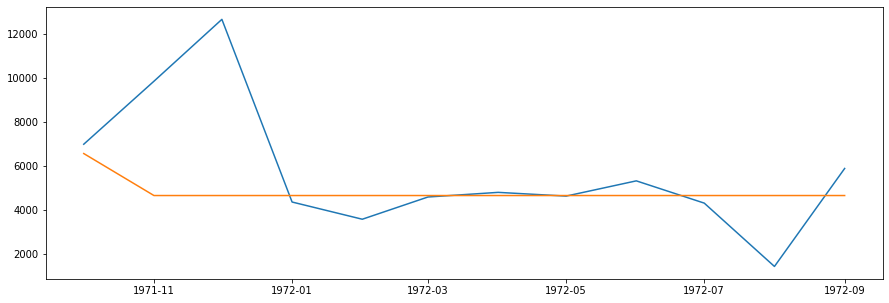

In [116]:
pred_start = test_sales.index[0]
pred_end = test_sales.index[-1]
predictedtsa = mamodeltrained.predict(start = pred_start, end = pred_end)
predictedtsa
plt.figure(figsize = (15, 5))
plt.plot(test_sales)
plt.plot(predictedtsa)

##ARMA Model

In [117]:
from statsmodels.tsa.arima.model import ARIMA
armamodel = ARIMA(train_sales['Sales'], order=(1,1,0)) #ARMA Model
armamodeltrained = armamodel.fit()
print(armamodeltrained.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   93
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -852.419
Date:                Mon, 11 Jan 2021   AIC                           1708.838
Time:                        11:08:41   BIC                           1713.882
Sample:                    01-01-1964   HQIC                          1710.874
                         - 09-01-1971                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0880      0.161     -0.545      0.585      -0.404       0.228
sigma2      6.608e+06   8.53e+05      7.745      0.000    4.94e+06    8.28e+06
Ljung-Box (L1) (Q):                   0.04   Jarque-

d:\program files\python39\datascience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
d:\program files\python39\datascience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
d:\program files\python39\datascience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


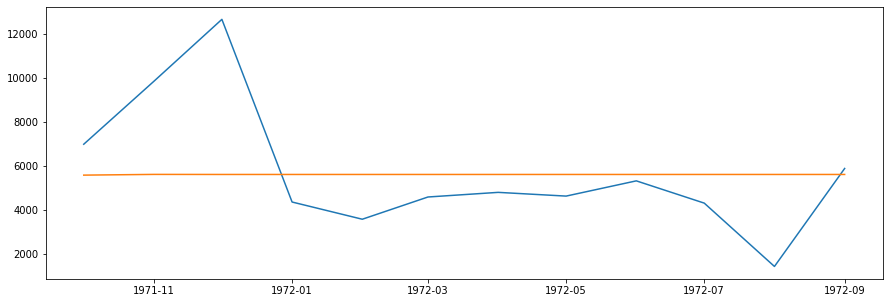

In [118]:
pred_start = test_sales.index[0]
pred_end = test_sales.index[-1]
predictedtsa = armamodeltrained.predict(start = pred_start, end = pred_end)
predictedtsa
plt.figure(figsize = (15, 5))
plt.plot(test_sales)
plt.plot(predictedtsa)

##ARIMA Model (AR/MA and ARIMA model using ARIMA)

In [119]:
from statsmodels.tsa.arima.model import ARIMA
arimamodel = ARIMA(train_sales['Sales'], order=(1,1,1)) #ARIMA Model
arimamodeltrained = arimamodel.fit()
print(arimamodeltrained.summary())

d:\program files\python39\datascience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
d:\program files\python39\datascience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
d:\program files\python39\datascience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   93
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -840.620
Date:                Mon, 11 Jan 2021   AIC                           1687.240
Time:                        11:08:42   BIC                           1694.805
Sample:                    01-01-1964   HQIC                          1690.294
                         - 09-01-1971                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4587      0.124      3.686      0.000       0.215       0.703
ma.L1         -0.9647      0.063    -15.228      0.000      -1.089      -0.841
sigma2      4.968e+06   5.98e+05      8.309      0.0

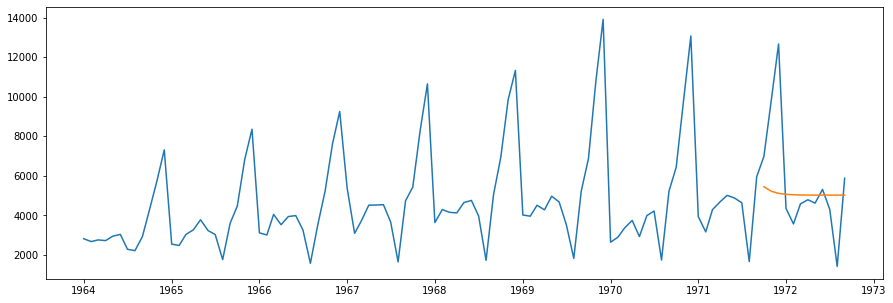

In [121]:
predictedtsanew4 = arimamodeltrained.predict(start = train_end, end = test_end - 1)
plt.figure(figsize = (15, 5))
plt.plot(salesdf['Sales'])
plt.plot(predictedtsanew4)

Try Seasonal Modelling using ARIMA

In [122]:
from statsmodels.tsa.arima.model import ARIMA
sarimamodel = ARIMA(train_sales['Sales'], order=(1,1,1),seasonal_order=(1,1,1,12)) #ARIMA Model
sarimamodeltrained = sarimamodel.fit()
print(sarimamodeltrained.summary())

d:\program files\python39\datascience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
d:\program files\python39\datascience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
d:\program files\python39\datascience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                                    SARIMAX Results                                     
Dep. Variable:                            Sales   No. Observations:                   93
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -645.640
Date:                          Mon, 11 Jan 2021   AIC                           1301.280
Time:                                  11:09:20   BIC                           1313.190
Sample:                              01-01-1964   HQIC                          1306.055
                                   - 09-01-1971                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2985      0.090      3.304      0.001       0.121       0.476
ma.L1         -0.9465      0.049    -19.127      0.

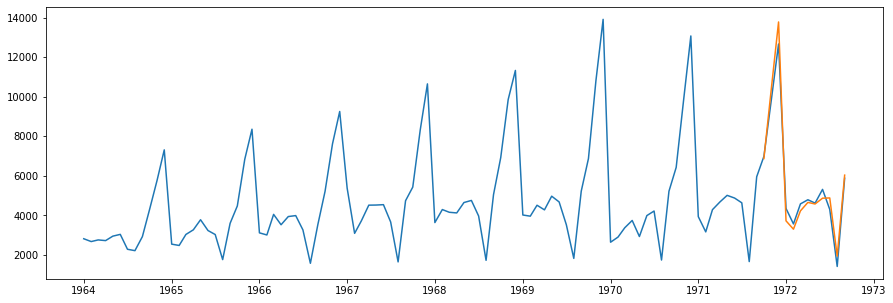

In [124]:
predictedtsanew5 = sarimamodeltrained.predict(start = train_end, end = test_end - 1)
plt.figure(figsize = (15, 5))
plt.plot(salesdf['Sales'])
plt.plot(predictedtsanew5)

# Below are unrelated Statements just good code snippets

In [ ]:
import requests
from io import BytesIO
air2 = requests.get('https://www.stata-press.com/data/r12/air2.dta').content
data2 = pd.read_stata(BytesIO(air2))
friedman2 = requests.get('https://www.stata-press.com/data/r12/friedman2.dta').content
data = pd.read_stata(BytesIO(friedman2))
data2.head(2)

In [ ]:
data.head(22)
endog = data.loc['1959':'1981', 'consump']
exog = sm.add_constant(data.loc['1959':'1981', 'm2'])

# Fit the model
mod = sm.tsa.statespace.SARIMAX(endog, exog, order=(1,0,1))
res = mod.fit(disp=False)
print(res.summary())

In [ ]:
####### Group Date Index Days Data Frame 
google.groupby(pd.TimeGrouper(freq='M')).max().head()
google.groupby(pd.TimeGrouper(freq='M')).min().head()
google['Volume'].groupby(pd.TimeGrouper(freq='M')).sum().dropna()

